**THEORITICAL**

1. What does R-squared represent in a regression model?

Answer:

R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It shows the goodness-of-fit of the model.

2. What are the assumptions of linear regression?

Answer:

1.Linearity

2.Independence of errors

3.Homoscedasticity

4.Normality of residuals

5.No multicollinearity

3. What is the difference between R-squared and Adjusted R-squared?

Answer:

R-squared measures the proportion of variance explained by the model, while Adjusted R-squared adjusts for the number of predictors and only increases if the new term improves the model more than expected by chance.

4. Why do we use Mean Squared Error (MSE)?

Answer:

MSE measures the average squared difference between the actual and predicted values. It penalizes larger errors more heavily, helping in identifying model accuracy.

5. What does an Adjusted R-squared value of 0.85 indicate?

Answer:

It means that 85% of the variability in the dependent variable is explained by the model, adjusted for the number of predictors.

6. How do we check for normality of residuals in linear regression?

Answer:

Using Q-Q plots, histograms, or statistical tests like the Shapiro-Wilk test.

7. What is multicollinearity, and how does it impact regression?

Answer:

Multicollinearity occurs when independent variables are highly correlated, making it difficult to isolate the effect of each predictor, which can inflate standard errors and reduce model interpretability.

8. What is Mean Absolute Error (MAE)?

Answer:

MAE is the average of the absolute differences between actual and predicted values. It measures the average magnitude of errors in a set of predictions.

9. What are the benefits of using an ML pipeline?

Answer:

1.Streamlines the workflow

2.Ensures reproducibility

3.Reduces human error

4.Makes it easy to manage preprocessing, training, and evaluation steps

10. Why is RMSE considered more interpretable than MSE?

Answer:

Because RMSE is in the same unit as the output variable, making it more intuitive for interpretation compared to squared units in MSE.

11. What is pickling in Python, and how is it useful in ML?

Answer:

Pickling is the process of serializing Python objects to save them to a file. It helps in saving trained ML models for reuse without retraining.

12. What does a high R-squared value mean?

Answer:

It means that a large proportion of the variance in the dependent variable is explained by the independent variables.

13. What happens if linear regression assumptions are violated?

Answer:

Model estimates may become biased, inefficient, or misleading, and the model's predictions might not be reliable.

14. How can we address multicollinearity in regression?

Answer:

1.Remove highly correlated variables

2.Use PCA or regularization techniques like Ridge or Lasso regression

15. How can feature selection improve model performance in regression analysis?

Answer:

It reduces overfitting, improves model accuracy, and enhances interpretability by removing irrelevant or redundant features.

16. How is Adjusted R-squared calculated?

Answer:

Adjusted R
2
=
1
−
(
(
1
−
𝑅
2
)
(
𝑛
−
1
)
𝑛
−
𝑘
−
1
)
Adjusted R
2
 =1−(
n−k−1
(1−R
2
 )(n−1)
​
 )
where n = number of observations, k = number of predictors.

17. Why is MSE sensitive to outliers?

Answer:

Because it squares the errors, giving more weight to larger errors which may be caused by outliers.

18. What is the role of homoscedasticity in linear regression?

Answer:

Homoscedasticity means constant variance of residuals. It's an assumption for valid statistical inference; violations may affect confidence intervals and hypothesis testing.

19. What is Root Mean Squared Error (RMSE)?

Answer:

It is the square root of the average of the squared differences between predicted and actual values. It measures model performance in the same unit as the target variable.

20. Why is pickling considered risky?

Answer:

Pickle files can execute arbitrary code and may pose security risks if loaded from untrusted sources.

21. What alternatives exist to pickling for saving ML models?

Answer:

1.Joblib

2.ONNX

3.PMML

Saving model weights using frameworks like TensorFlow or PyTorch

22. What is heteroscedasticity, and why is it a problem?

Answer:

Heteroscedasticity occurs when residuals have non-constant variance. It violates regression assumptions and can lead to inefficient estimates and unreliable statistical tests.

23. How can interaction terms enhance a regression model's predictive power?

Answer:

They allow the model to account for the combined effect of variables, capturing relationships that are not evident when considering variables individually.

**PRACTICALS**

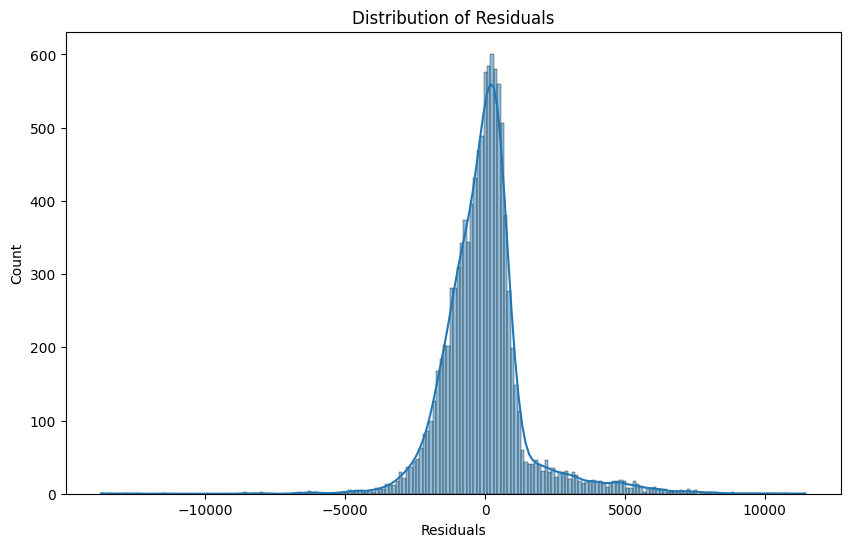

MSE: 2333883.1792799835
MAE: 994.736665092202
RMSE: 1527.7052003838908


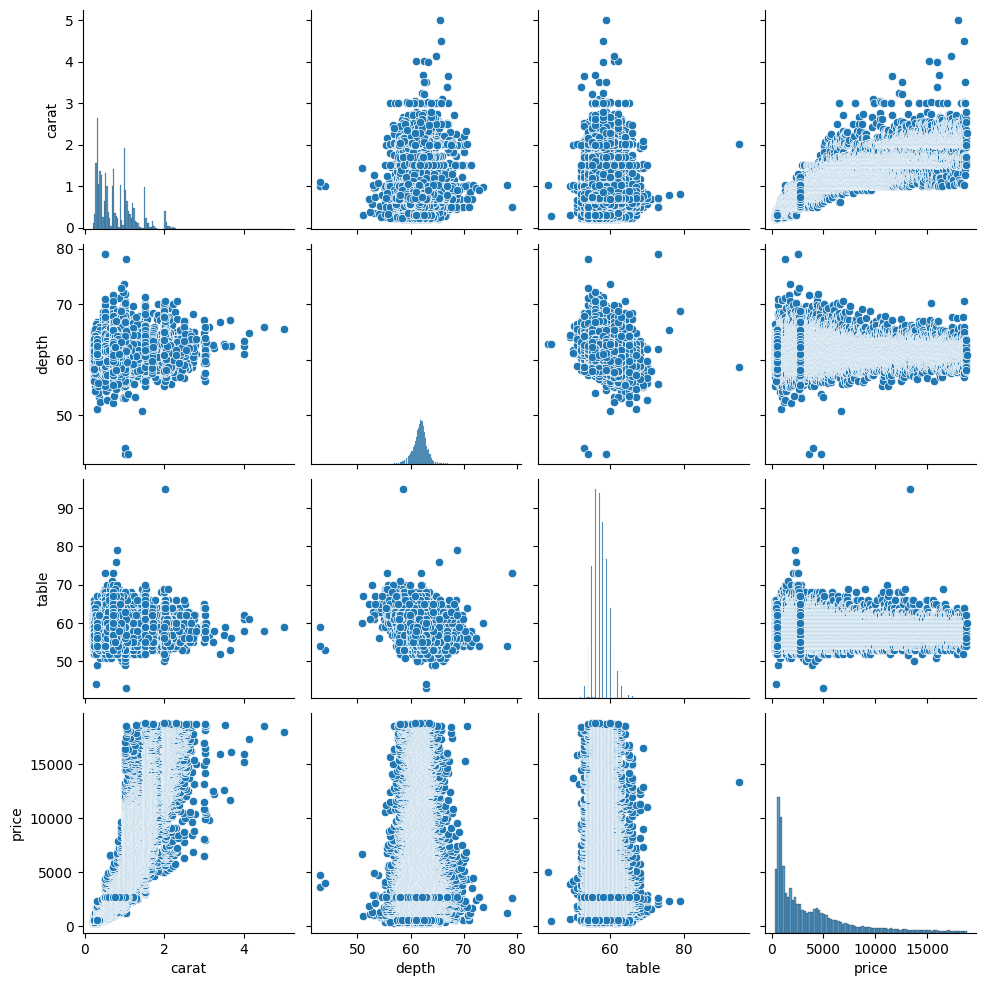

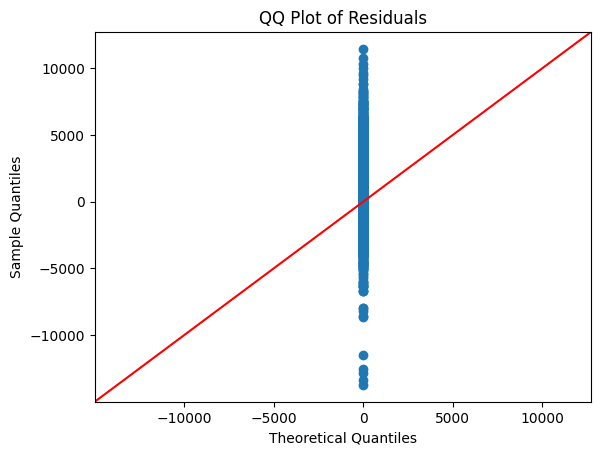

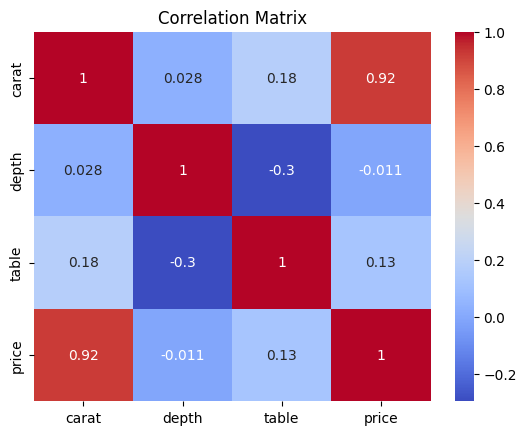

Pipeline score: 0.8716375344399143
Coefficients: [7873.05329205 -150.40764283 -106.41813265]
Intercept: 13056.321710255172
R-squared score: 0.853185544894256


In [7]:
# Practical 1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = sns.load_dataset('diamonds').dropna()

# Select numeric features
X = df[['carat', 'depth', 'table']]
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Practical 2
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

# Practical 3
import statsmodels.api as sm
import seaborn as sns

# Linearity
sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.show()

# Residual plot for homoscedasticity
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Correlation matrix
sns.heatmap(df[['carat', 'depth', 'table', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Practical 4
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)
print("Pipeline score:", pipeline.score(X_test, y_test))

# Practical 5
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", model.score(X_test, y_test))










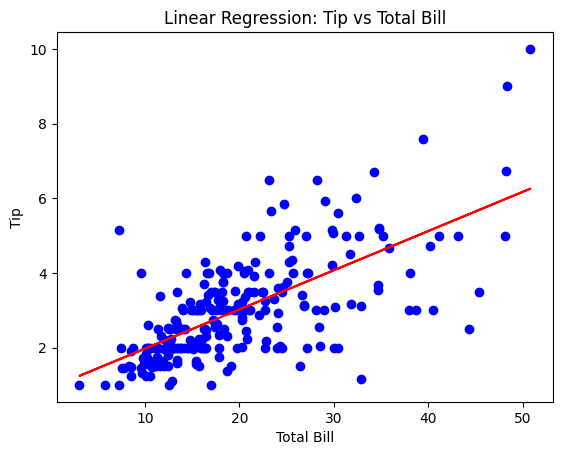

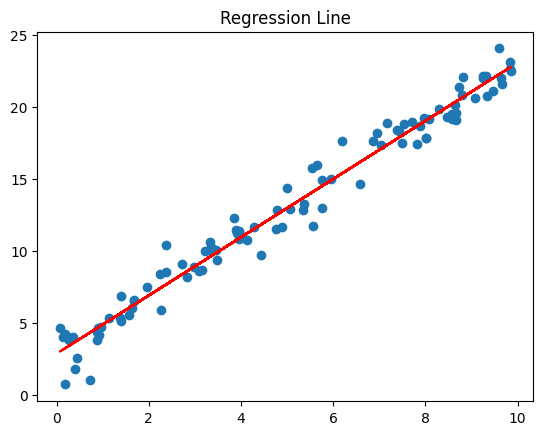

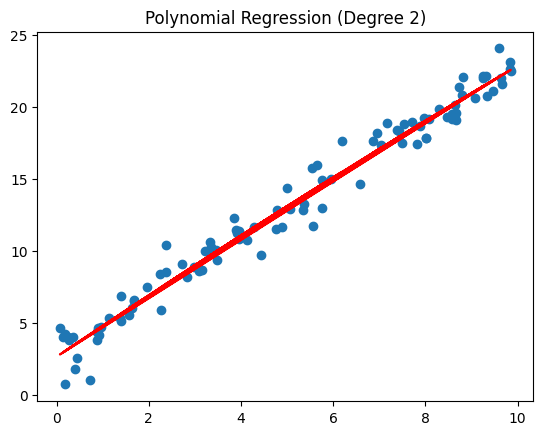

Coefficient: [[2.02054237]]
Intercept: [0.89074942]


In [3]:
# Practical 6
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression: Tip vs Total Bill')
plt.show()

# Practical 7
import numpy as np
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regression Line')
plt.show()

# Practical 8
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Practical 9
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

# Practical 10
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Degree 1 R^2: 0.9685397419181562
Degree 2 R^2: 0.968598407780937
Degree 3 R^2: 0.9691702024149608
Degree 4 R^2: 0.9691867640895088
Coefficients: [[ 2.02487512 -0.03258181]]
Intercept: [1.03211202]
R-squared: 0.968783828086476


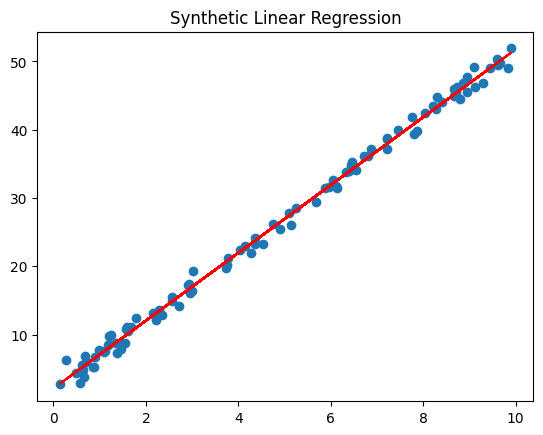

  feature        VIF
0       A   1.079640
1       B   1.083075
2       C   1.005097
3   const  12.321113


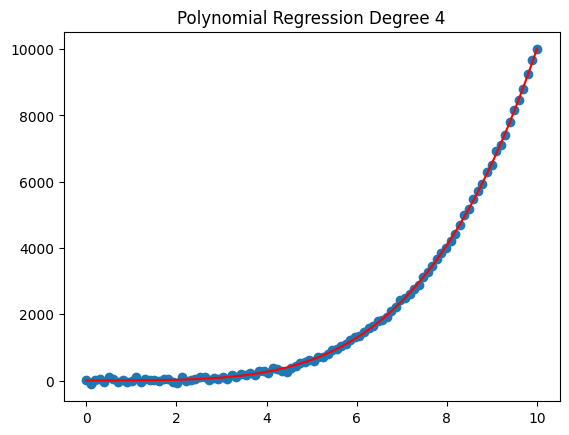

In [4]:
# Practical 11
degrees = [1, 2, 3, 4]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {d} R^2:", model.score(X_poly, y))

# Practical 12
X = np.hstack((X, np.random.rand(100, 1) * 10))
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

# Practical 13
X = np.random.rand(100, 1) * 10
y = 5 * X + 2 + np.random.randn(100, 1)
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Synthetic Linear Regression')
plt.show()

# Practical 14
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])
X['const'] = 1
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Practical 15
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = X**4 + np.random.randn(100, 1) * 50
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression Degree 4')
plt.show()

R-squared: 0.7464039657813321


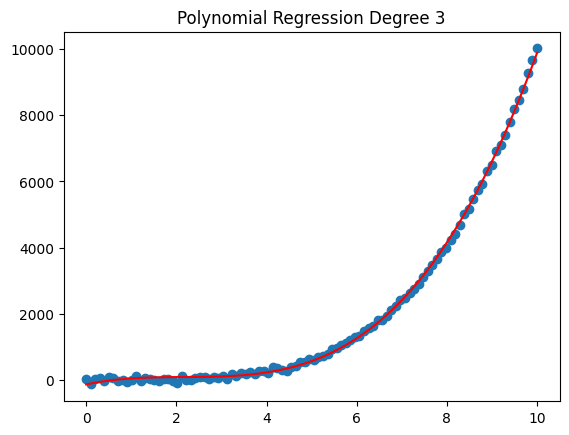

R-squared: 0.5506745078758015
Coefficients: [ 3.00753377  2.01894243 -0.0036221  -0.44484352 -0.24326402]


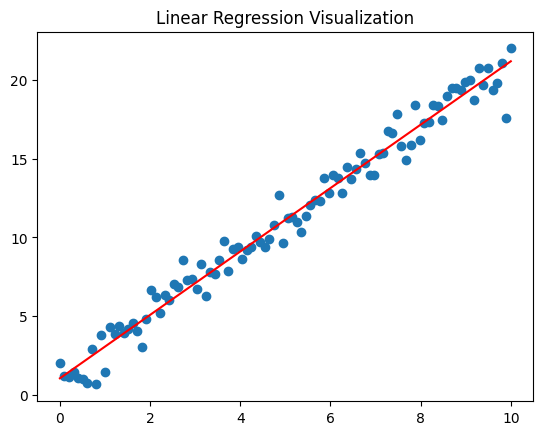

R-squared: 0.5726878436925384
Coefficients: [ 1.91954241 -2.02206467  3.050916  ]


In [5]:
# Practical 16
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X, y)
print("R-squared:", pipeline.score(X, y))

# Practical 17
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression Degree 3')
plt.show()

# Practical 18
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.randn(100)
model = LinearRegression().fit(X, y)
print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)

# Practical 19
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1)
model = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression Visualization')
plt.show()

# Practical 20
X = np.random.rand(100, 3)
y = X @ np.array([1.5, -2.0, 3.0]) + 5 + np.random.randn(100)
model = LinearRegression().fit(X, y)
print("R-squared:", model.score(X, y))
print("Coefficients:", model.coef_)

In [6]:
# Practical 21
from joblib import dump, load
model = LinearRegression().fit(X, y)
dump(model, 'model.joblib')
model_loaded = load('model.joblib')
print("Loaded model score:", model_loaded.score(X, y))

# Practical 22
tips = sns.load_dataset('tips')
tips = pd.get_dummies(tips, drop_first=True)
X = tips.drop('tip', axis=1)
y = tips['tip']
model = LinearRegression().fit(X, y)
print("R-squared:", model.score(X, y))

# Practical 23
from sklearn.linear_model import Ridge
X = np.random.rand(100, 3)
y = X @ np.array([3, -1, 2]) + np.random.randn(100)
lin_model = LinearRegression().fit(X, y)
ridge_model = Ridge(alpha=1.0).fit(X, y)
print("Linear R2:", lin_model.score(X, y))
print("Ridge R2:", ridge_model.score(X, y))

# Practical 24
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated R-squared scores:", scores)
print("Mean R-squared:", scores.mean())

# Practical 25
degrees = [1, 2, 3, 4, 5]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {d} R^2:", model.score(X_poly, y))

Loaded model score: 0.5726878436925384
R-squared: 0.47007812322060794
Linear R2: 0.4640711609509768
Ridge R2: 0.45890444702607247
Cross-validated R-squared scores: [ 0.53230173  0.46665297  0.49547035 -0.43226927  0.3081685 ]
Mean R-squared: 0.27406485601870234
Degree 1 R^2: 0.4640711609509768
Degree 2 R^2: 0.49155912291542847
Degree 3 R^2: 0.5457418282548916
Degree 4 R^2: 0.5964615075255653
Degree 5 R^2: 0.7362546253926028
